# Visualize Your Notes

The following code will read the pattern of wikilinks between your notes and visualize that pattern as a network graph. The visualization might reveal clusters of interesting ideas or other insights. You can also extend the code to identify key files, clusters, shortest paths etc. (For instance, the shortest path between two files/ideas might provide you with the structure for an essay or longer piece of writing).

## Functions

In [2]:
!pip install networkx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)


In [6]:
import json
import matplotlib.pyplot as plt
import networkx as nx

def load_wikilink_data(filepath):
    """Load the wikilink JSON file."""
    with open(filepath, 'r') as f:
        return json.load(f)

def create_graph(data):
    """Create a NetworkX graph from the wikilink data."""
    G = nx.Graph()
    links = data.get('links', {})
    
    for source, targets in links.items():
        for target in (targets if isinstance(targets, list) else targets.keys()):
            G.add_edge(source, target)
    
    return G

def show_graph_info(G):
    """Print basic information about the graph."""
    print(f"Nodes: {len(G.nodes())}")
    print(f"Edges: {len(G.edges())}")
    if len(G.nodes()) > 0:
        print(f"Average connections: {sum(dict(G.degree()).values()) / len(G.nodes()):.1f}")

def plot_graph(G):
    """Create a simple visualization of the graph."""
    plt.figure(figsize=(10, 8))
    
    if len(G.nodes()) == 0:
        plt.text(0.5, 0.5, 'No links found', ha='center', va='center', fontsize=16)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
    else:
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=1000, font_size=10, font_weight='bold')
    
    plt.title('WikiLink Graph')
    plt.axis('off')
    plt.show()



## Do It!

Nodes: 20
Edges: 17
Average connections: 1.7


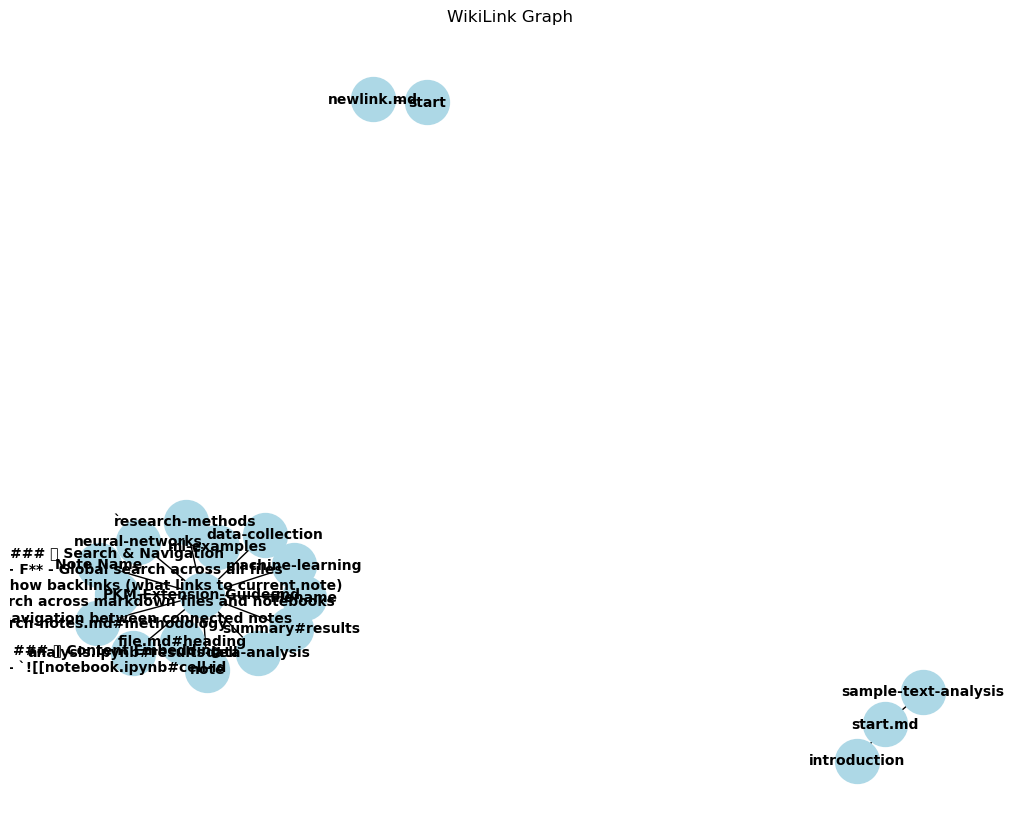

In [8]:
data = load_wikilink_data('wikilink-index.json')
graph = create_graph(data)
show_graph_info(graph)
plot_graph(graph)

[[start]] [[another]] [[thing]]
